In [36]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [16]:
# Load the dataset
df = pd.read_csv("./dataset.csv")

In [17]:
# Display the first few rows of the dataset
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# ***Data Preprocessing***

In [18]:
# Convert categorical columns to numerical using Label Encoding
label_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
              'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
              'PaperlessBilling', 'PaymentMethod', 'Churn']

In [19]:
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [20]:
# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# ***Exploratory Data Analysis (EDA)***

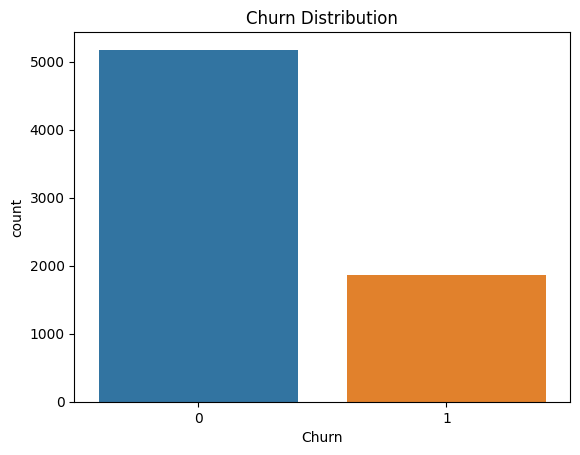

In [21]:
# Visualize the distribution of Churn
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

<ipython-input-22-bdcb0b724488>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


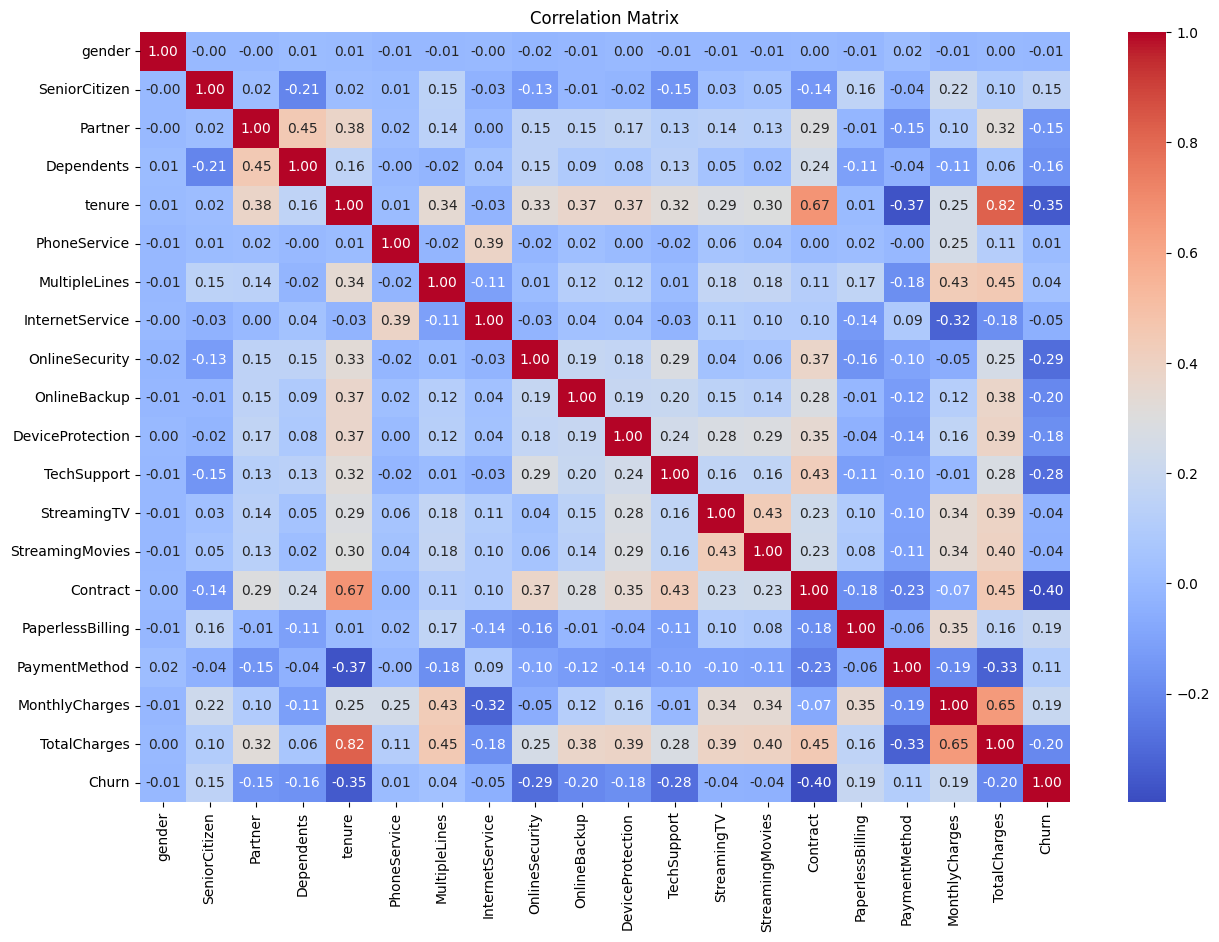

In [22]:
# Visualize the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# ***Feature Engineering***

In [23]:
# # Create relevant features
# df['MonthlyChargesPerTenure'] = df['MonthlyCharges'] / df['tenure']
# df['SecurityBackupCombo'] = (df['OnlineSecurity'] == 1) & (df['OnlineBackup'] == 1)
# df['StreamingCombo'] = (df['StreamingTV'] == 1) & (df['StreamingMovies'] == 1)
# df['ContractPaperlessCombo'] = (df['Contract'] == 1) & (df['PaperlessBilling'] == 1)
# df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72],
#                             labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'], right=False)
# df['SeniorWithDependents'] = (df['SeniorCitizen'] == 1) & (df['Dependents'] == 1)

# ***Model Building***

In [24]:
# Select features and target variable
features = df.drop(['customerID', 'Churn'], axis=1)
target = df['Churn']

In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [26]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Model Evaluation
y_pred = model.predict(X_test_scaled)

In [29]:
# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
 [[943  93]
 [198 175]]


In [32]:
model2 = LogisticRegression()
model2.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
# Model Evaluation
y_pred2 = model2.predict(X_test_scaled)

In [34]:
# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Confusion Matrix:
 [[933 103]
 [156 217]]


In [43]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Precision:", precision_score(y_test, y_pred)*100)
print("Recall:", recall_score(y_test, y_pred)*100)
print("F1 Score:", f1_score(y_test, y_pred)*100)

Accuracy: 79.347054648687
Precision: 65.29850746268657
Recall: 46.91689008042895
F1 Score: 54.60218408736349


In [44]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred2)*100)
print("Precision:", precision_score(y_test, y_pred2)*100)
print("Recall:", recall_score(y_test, y_pred2)*100)
print("F1 Score:", f1_score(y_test, y_pred2)*100)

Accuracy: 81.61816891412349
Precision: 67.8125
Recall: 58.17694369973191
F1 Score: 62.62626262626263


In [39]:
# Display feature importances
feature_importances = pd.Series(model.feature_importances_, index=features.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
 TotalCharges        0.190022
MonthlyCharges      0.177682
tenure              0.157228
Contract            0.077324
PaymentMethod       0.050392
OnlineSecurity      0.047675
TechSupport         0.044250
gender              0.028209
OnlineBackup        0.027190
InternetService     0.026254
PaperlessBilling    0.024919
Partner             0.023813
MultipleLines       0.023011
DeviceProtection    0.021065
Dependents          0.020654
SeniorCitizen       0.020374
StreamingMovies     0.017798
StreamingTV         0.016839
PhoneService        0.005301
dtype: float64


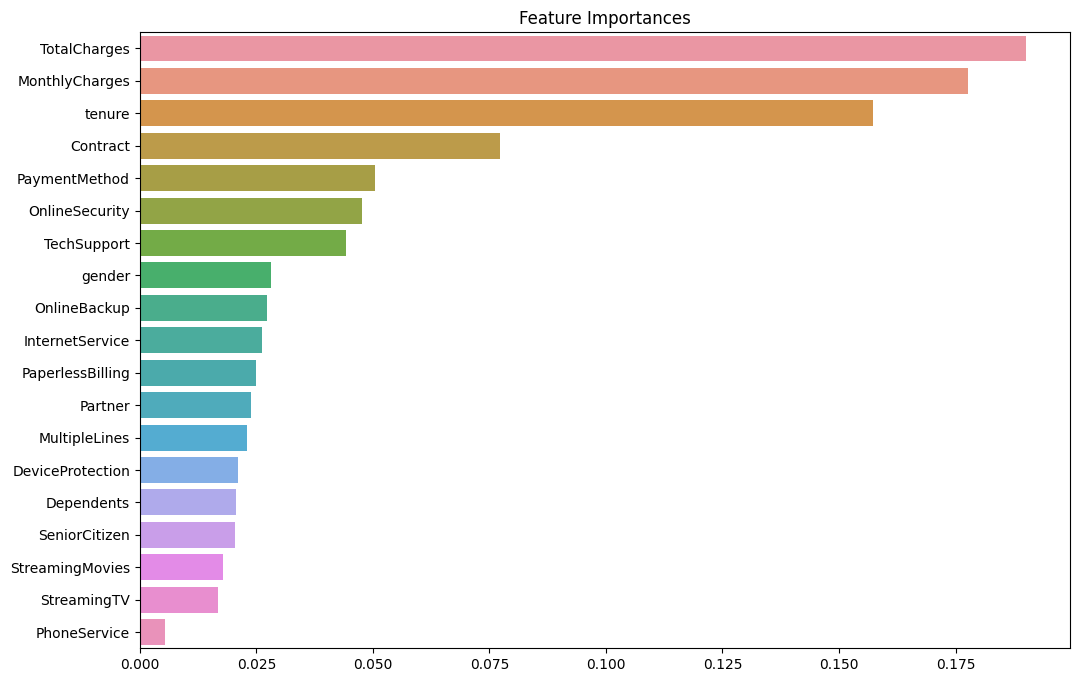

In [40]:
# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

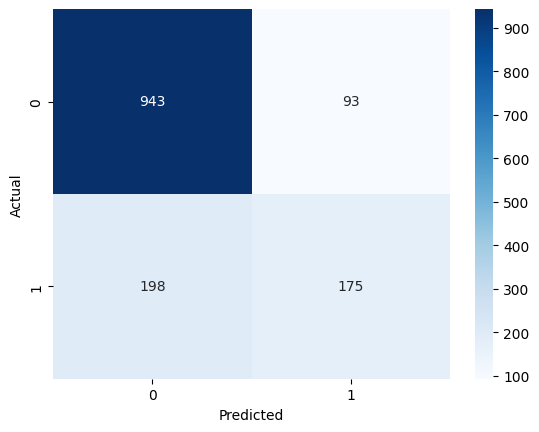

In [45]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

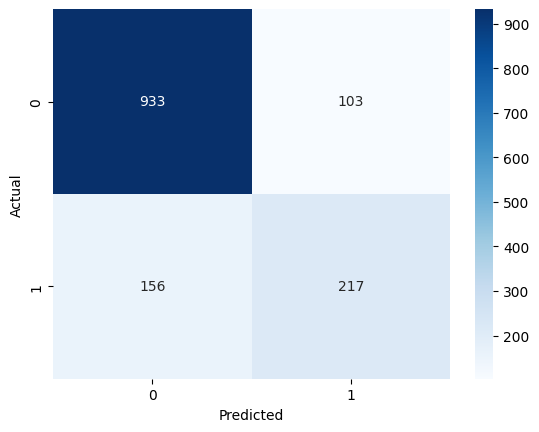

In [46]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()